## This notebook shows how to plot the data in the "figure" directories to produced the figures included in the paper

In [1]:
#import necessary library and define parameters for curve plotting. 
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import matplotlib as mpl 
from matplotlib import gridspec

### Global settings for plots

In [2]:
mpl.rc('lines', linewidth=1, color='black')
mpl.rc('font', size=16, family='serif')
mpl.rc('text', color='black')
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['grid.linewidth'] = 2.0
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 16

### Set up function for plotting edge dislocations symbols in possibly rotated coordinates

In [3]:
def plot_discrete_system(ax, x, y, sign, theta, h):
    def plot_one_edge(ax, x, y, sign, theta, h):
        c = 'dodgerblue' if sign < 0 else 'orangered'
        originx = x
        originy = y 
        rotate_x_left = x - h / 2 * np.cos(theta * np.pi / 180)
        rotate_x_right = x + h / 2 * np.cos(theta * np.pi / 180)
        rotate_y_left = y - h / 2 * np.sin(theta * np.pi / 180)
        rotate_y_right = y + h / 2 * np.sin(theta * np.pi / 180)
        ax.plot([rotate_x_left, rotate_x_right], [rotate_y_left, rotate_y_right], lw=1.0, c=c, zorder=5)
        
        rotate_x = x - h * np.sin(theta * np.pi / 180) * sign
        rotate_y = y + h * np.cos(theta * np.pi / 180) * sign
        ax.plot([rotate_x, x], [rotate_y,y], lw=1.0, c=c, zorder=5)

    # plot edges
    for i, sign in enumerate(sign):
        plot_one_edge(ax, x[i], y[i], sign, theta, h)

### Figure 4c, dislocation configuration in tension

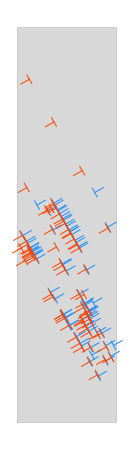

In [4]:
file = np.loadtxt('figure-4c/dislocation-position-tension.txt')

# all data in the file is located in a rectangular domain with the following size:
xlim = [0, 1]  
ylim = [0, 4]

# position and sign of edge dislocations
x = file[:,0]
y = file[:,1]
sign = file[:,2]

# orientation angle of the slip system relative to the global positive x direction
angle = 120

# set up figure and plot everything
fig,ax = plt.subplots(figsize=(3, 8))
ax.fill_between(xlim, ylim[0], ylim[1], color='gray', alpha=0.3)
plot_discrete_system(ax, x, y, sign, theta=angle, h=0.1)
ax.set_aspect('equal')
plt.axis('off');

### Figure 4d, dislocation configuration in bending

(-2.2, 2.2, -0.639882667397366, 0.5542801270189222)

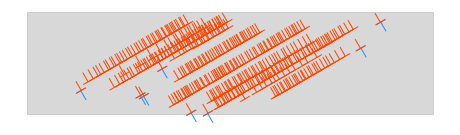

In [5]:
file = np.loadtxt('figure-4d/dislocation-position-bending.txt')  

# all data in the file is located in a rectangular domain with the following size:
xlim = [-2, 2]  
ylim = [-0.5, 0.5]

# position and sign of edge dislocations
x = file[:,0]
y = file[:,1]
sign = file[:,2]

# orientation angle of the slip system
angle = 30

# set up figure and plot everything
fig,ax = plt.subplots(figsize=(8, 3))
ax.fill_between(xlim, ylim[0], ylim[1], color='gray', alpha=0.3)
plot_discrete_system(ax, x, y, sign, theta=angle, h=0.1)
ax.set_aspect('equal')
plt.axis('off')

### Figure 5a, energy contour plot and dislocation density plot based on dislocation configuration in tension

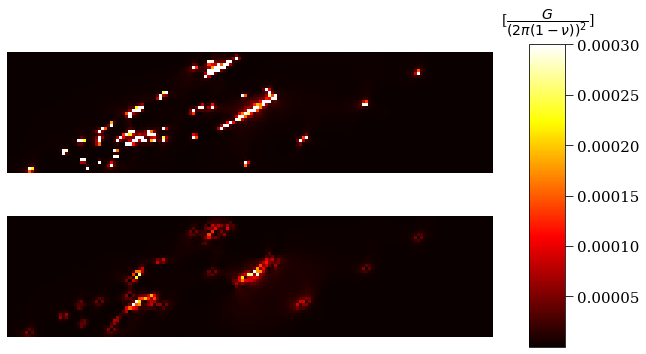

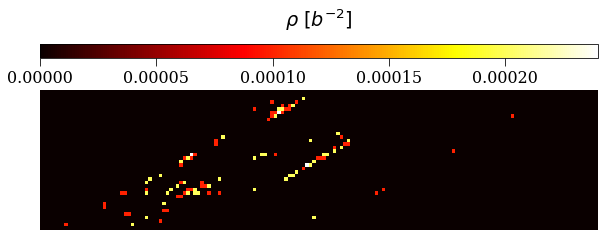

In [6]:
# energy density files
energy_ref = np.loadtxt('figure-5/tension/tension-energy_ref.txt')
energy_vox = np.loadtxt('figure-5/tension/tension-energy_vox.txt')

# set up figure and make contour plots for energy density with imshow
fig, (ax0,ax1) = plt.subplots(ncols=1, nrows=2, figsize=(10, 6.), gridspec_kw={'hspace': 0.01})
im0 = ax0.imshow(energy_ref.T, aspect='equal', cmap="hot", origin='upper', vmax=3e-4)
im1 = ax1.imshow(energy_vox.T, aspect='equal', cmap="hot", origin='upper', vmax=3e-4)
ax0.axis('off')
ax1.axis('off')

# add a subplot as the colorbar 
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax.tick_params(labelsize=15) 
fig.colorbar(im1, cax=cbar_ax)
cbar_ax.xaxis.set_label_position('top') 
cbar_ax.set_xlabel(r'[$\dfrac{G}{\left(2\pi(1-\nu)\right)^2}$]',labelpad=20)
cbar_ax.xaxis.label.set_size(14)


# dislocation density file
dislocation_density = np.loadtxt('figure-5/tension/tension-dislocation-density-dx100.txt')
# Set up plot using gridspec, ax[0] plots the colorbar 
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 1, hspace=0.003,height_ratios=[0.07,1])    
ax = [plt.subplot(gs[i]) for i in range(2)]   
ml = np.max(dislocation_density[:, :])
im1 = ax[1].imshow(dislocation_density, aspect='equal', cmap="hot", origin='upper', vmax=ml*0.8)
ax[1].axis('off')
cbar =plt.colorbar(im1, cax=ax[0], orientation='horizontal') 
cbar.set_label(r'$\rho$ $[b^{-2}]$', size='large', labelpad=-80)

### Figure 5b, energy contour plot and dislocation density plot based on dislocation configuration in bending

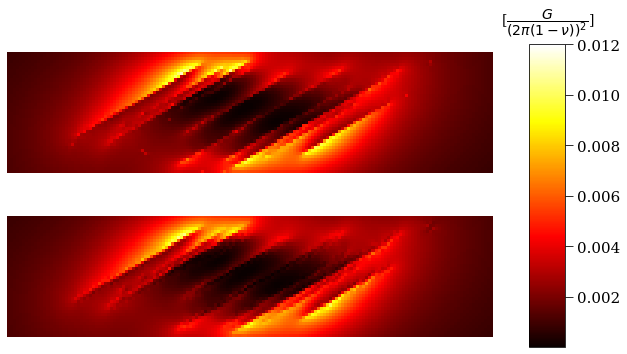

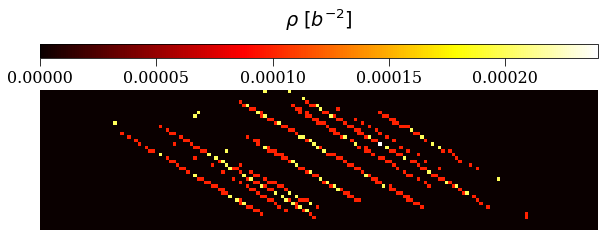

In [7]:
# energy density files
energy_ref = np.loadtxt('figure-5/bending/bending-energy_ref.txt')
energy_vox = np.loadtxt('figure-5/bending/bending-energy_vox.txt')

# set up figure and make contour plots for energy density with imshow
fig, (ax0,ax1) = plt.subplots(ncols=1, nrows=2, figsize=(10, 6.), gridspec_kw={'hspace': 0.01})
im0 = ax0.imshow(energy_ref, aspect='equal', cmap="hot", origin='lower', vmin=5e-6, vmax=1.2e-2)
im1 = ax1.imshow(energy_vox, aspect='equal', cmap="hot", origin='lower', vmin=5e-6, vmax=1.2e-2)
ax0.axis('off')
ax1.axis('off')

# add a subplot as the colorbar 
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_ax.tick_params(labelsize=15) 
fig.colorbar(im1, cax=cbar_ax)
cbar_ax.xaxis.set_label_position('top') 
cbar_ax.set_xlabel(r'[$\dfrac{G}{\left(2\pi(1-\nu)\right)^2}$]', labelpad=20)
cbar_ax.xaxis.label.set_size(14)


# dislocation density file
dislocation_density = np.loadtxt('figure-5/bending/bending-dislocation-density-dx100.txt')
# Set up plot using gridspec 
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(2, 1, hspace=0.003, height_ratios=[0.07,1])    
ax = [plt.subplot(gs[i]) for i in range(2)]   
ml = np.max(dislocation_density[:, :])
im1 = ax[1].imshow(dislocation_density.T, aspect='equal', cmap="hot", origin='upper', vmax=ml*0.8)
ax[1].axis('off')
cbar =plt.colorbar(im1, cax=ax[0], orientation='horizontal') 
cbar.set_label(r'$\rho$ $[b^{-2}]$', size='large', labelpad=-80)

### Figure 7, summary of fitting parameter in both tension and bending

(-0.1, 0)

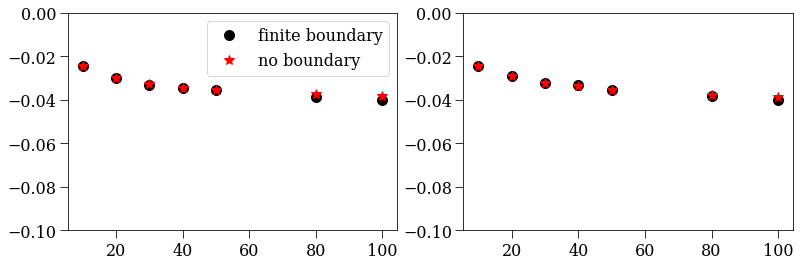

In [8]:
tension_no_image = np.loadtxt('figure-7/tension/noimage-data.txt')
tension_image = np.loadtxt('figure-7/tension/image-data.txt')
bending_no_image = np.loadtxt('figure-7/bending/noimage-data.txt')
bending_image = np.loadtxt('figure-7/bending/image-data.txt')

# set up plot and plot the data
fig, ax = plt.subplots(ncols=2, figsize=(13,4))
ax[0].plot(tension_image[:,0], tension_image[:,1], color='black', marker='o', \
           markersize='10', linestyle="None", label='finite boundary')
ax[0].plot(tension_no_image[:,0], tension_no_image[:,1], color='red', marker='*', \
           markersize='10', linestyle="None",label='no boundary')
ax[0].set_ylim([-0.1,0])
ax[0].legend(loc='upper right')
ax[1].plot(bending_image[:,0], bending_image[:,1], color='black', marker='o', \
           markersize='10', linestyle="None")
ax[1].plot(bending_no_image[:,0], bending_no_image[:,1], color='red', marker='*', \
           markersize='10', linestyle="None")
ax[1].set_ylim([-0.1,0])


### Figure 8 (c) and (d), energy density as function of dislocation density for 3D random loop structures. 

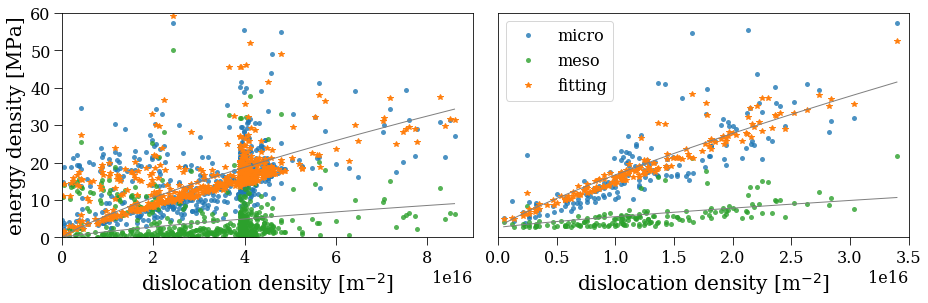

In [9]:
# load data of voxel size 20b
micro_data_20b = np.loadtxt('figure-8/20b-micro-data.txt')
micro_data_20b_fitting = np.loadtxt('figure-8/20b-micro-line-fitting-data.txt')
fitting_data_20b = np.loadtxt('figure-8/20b-fitting-data.txt')
meso_data_20b = np.loadtxt('figure-8/20b-meso-data.txt')
meso_data_20b_fitting = np.loadtxt('figure-8/20b-meso-line-fitting-data.txt')

# load data of voxel size 40b
micro_data_40b = np.loadtxt('figure-8/40b-micro-data.txt')
micro_data_40b_fitting = np.loadtxt('figure-8/40b-micro-line-fitting-data.txt')
fitting_data_40b = np.loadtxt('figure-8/40b-fitting-data.txt')
meso_data_40b = np.loadtxt('figure-8/40b-meso-data.txt')
meso_data_40b_fitting = np.loadtxt('figure-8/40b-meso-line-fitting-data.txt')

# set up plot and style, plot all data 
fig,ax = plt.subplots(ncols=2, figsize=(13,4.5))
plot_kw={'lw':0, 'marker': '.', 'markeredgecolor':'none','ms':10,'alpha':0.8}
ax[0].plot(micro_data_20b[:,0], micro_data_20b[:,1], **plot_kw, c='C0', label='micro')
ax[0].plot(meso_data_20b[:,0], meso_data_20b[:,1], **plot_kw, c='C2', label='meso')
ax[0].plot(fitting_data_20b[:,0], fitting_data_20b[:,1], lw=0, marker='*', c='C1', label='fitting')
ax[0].plot(micro_data_20b_fitting[:,0], micro_data_20b_fitting[:,1], c='gray')
ax[0].plot(meso_data_20b_fitting[:,0], meso_data_20b_fitting[:,1], c='gray')
ax[0].set_xlabel('dislocation density [m$^{-2}$]')
ax[0].set_ylabel('energy density [MPa]')
ax[0].set_xlim([0,9e16])
ax[0].set_ylim([0,60])
ax[1].plot(micro_data_40b[:,0], micro_data_40b[:,1], **plot_kw, c='C0', label='micro')
ax[1].plot(meso_data_40b[:,0], meso_data_40b[:,1], **plot_kw, c='C2', label='meso')
ax[1].plot(fitting_data_40b[:,0], fitting_data_40b[:,1], lw=0, marker='*', c='C1', label='fitting')
ax[1].plot(micro_data_40b_fitting[:,0], micro_data_40b_fitting[:,1], c='gray')
ax[1].plot(meso_data_40b_fitting[:,0], meso_data_40b_fitting[:,1], c='gray')
ax[1].set_xlabel('dislocation density [m$^{-2}$]')
ax[1].set_yticks([])
ax[1].set_xlim([0,3.5e16])
ax[1].legend(loc='upper left')
fig.tight_layout()

### Figure 9 (c) and (d), energy density as function of dislocation density for 3D relaxed dislocation structures

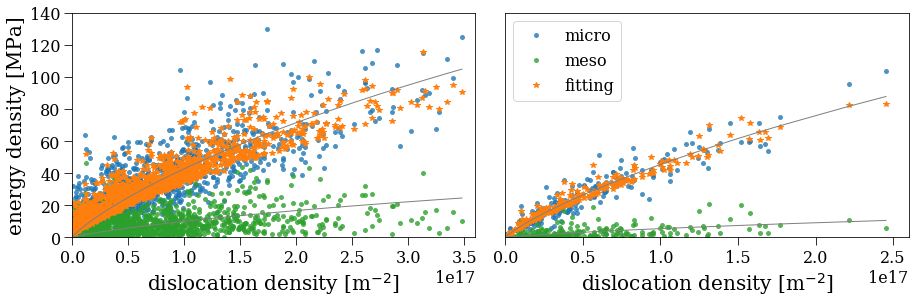

In [10]:
# load data of voxel size 20b
micro_data_20b = np.loadtxt('figure-9/20b-micro-data.txt')
micro_data_20b_fitting = np.loadtxt('figure-9/20b-micro-line-fitting-data.txt')
fitting_data_20b = np.loadtxt('figure-9/20b-fitting-data.txt')
meso_data_20b = np.loadtxt('figure-9/20b-meso-data.txt')
meso_data_20b_fitting = np.loadtxt('figure-9/20b-meso-line-fitting-data.txt')

# load data of voxel size 40b
micro_data_40b = np.loadtxt('figure-9/40b-micro-data.txt')
micro_data_40b_fitting = np.loadtxt('figure-9/40b-micro-line-fitting-data.txt')
fitting_data_40b = np.loadtxt('figure-9/40b-fitting-data.txt')
meso_data_40b = np.loadtxt('figure-9/40b-meso-data.txt')
meso_data_40b_fitting = np.loadtxt('figure-9/40b-meso-line-fitting-data.txt')

# set up plot and style, plot all data
fig,ax = plt.subplots(ncols=2, figsize= (13,4.5))
plot_kw={'lw':0, 'marker': '.', 'markeredgecolor':'none','ms':10,'alpha':0.8}
ax[0].plot(micro_data_20b[:,0], micro_data_20b[:,1], **plot_kw, c='C0', label='micro')
ax[0].plot(meso_data_20b[:,0], meso_data_20b[:,1], **plot_kw, c='C2', label='meso')
ax[0].plot(fitting_data_20b[:,0], fitting_data_20b[:,1], lw=0, marker='*', c='C1', label='fitting')
ax[0].plot(micro_data_20b_fitting[:,0], micro_data_20b_fitting[:,1], c='gray')
ax[0].plot(meso_data_20b_fitting[:,0], meso_data_20b_fitting[:,1], c='gray')
ax[0].set_xlabel('dislocation density [m$^{-2}$]')
ax[0].set_ylabel('energy density [MPa]')
ax[0].set_xlim([0,3.6e17])
ax[0].set_ylim([0,140])
ax[1].plot(micro_data_40b[:,0], micro_data_40b[:,1], **plot_kw, c='C0', label='micro')
ax[1].plot(meso_data_40b[:,0], meso_data_40b[:,1], **plot_kw, c='C2', label='meso')
ax[1].plot(fitting_data_40b[:,0], fitting_data_40b[:,1], lw=0, marker='*', c='C1', label='fitting')
ax[1].plot(micro_data_40b_fitting[:,0],micro_data_40b_fitting[:,1], c='gray')
ax[1].plot(meso_data_40b_fitting[:,0],meso_data_40b_fitting[:,1], c='gray')
ax[1].set_xlabel('dislocation density [m$^{-2}$]')
ax[1].set_yticks([])
ax[1].set_ylim([0,140])
ax[1].set_xlim([0,2.6e17])
ax[1].legend(loc='upper left')
fig.tight_layout()


### Figure 10, summary of all fitting parameter C in both 2D and 3D dislocation structures

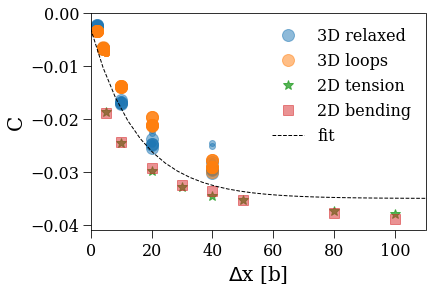

<Figure size 360x288 with 0 Axes>

In [11]:
# load data of 3D relaxed structure
files = glob.glob('figure-10/realistic-data/*nm/data*.txt')
for i, file in enumerate(files):
    size = file.split('realistic-data/')[1].split('nm/')[0]
    a = np.loadtxt(file)
    if i==0:
        plt.plot(a[:,0],-a[:,1], "C0o", markersize=int(size)/5, alpha=0.5, label='3D relaxed')
    else:
        plt.plot(a[:,0],-a[:,1], "C0o", markersize=int(size)/5, alpha=0.5)

# load data of 3D loop structure
files = glob.glob('figure-10/random-loops/*nm/data*.txt')
for i, file in enumerate(files):
    size = file.split('random-loops/')[1].split('nm/')[0]
    a = np.loadtxt(file)
    if i==0:
        plt.plot(a[:,0],-a[:,1], "C1o", markersize=int(size)/5, alpha=0.5, label='3D loops')
    else:
        plt.plot(a[:,0],-a[:,1], "C1o", markersize=int(size)/5, alpha=0.5)

# load data of 2D tension structure    
file = np.loadtxt('figure-10/2D-DDD/tension-data.txt')
plt.plot(file[:,0],file[:,1], "C2*", markersize=10, alpha=0.8, label='2D tension')

# load data of 2D bending structure    
file = np.loadtxt('figure-10/2D-DDD/bending-data.txt')
plt.plot(file[:,0],file[:,1], "C3s", markersize=10, alpha=0.5, label='2D bending')

    
# add fitting curve
x = np.linspace(0, 200, 50)
plt.plot(x, 0.032 * np.exp(- 0.064 * x) -  0.035, c='k', ls='--', label='fit')

# set up figure details
plt.xlim([0,110])
plt.ylim([-0.041, 0])
plt.xlabel('$\Delta$x [b]')
plt.ylabel('C')
plt.legend(frameon=False)
plt.figure(figsize=(5,4))
fig.tight_layout()

### Figure 10 replot, scaled voxel size by the averaged dislocation distance

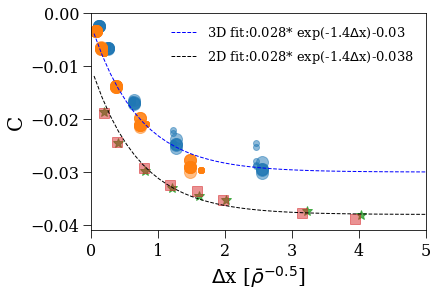

<Figure size 360x288 with 0 Axes>

In [12]:
# load data of 3D relaxed structure
files = glob.glob('figure-10/realistic-data/*nm/data*.txt')
for i, file in enumerate(files):
    size = file.split('realistic-data/')[1].split('nm/')[0]
    size_i = int(size)
    if size_i == 30:
        average_spacing = 1/(6.113e16)**0.5/(0.25e-9)
    else:
        average_spacing = 1/(6.565e16)**0.5/(0.25e-9)  # dislocation spacing in 60nm microstructures

    a = np.loadtxt(file)
    plt.plot(a[:,0]/average_spacing,-a[:,1], "C0o", markersize=int(size)/5, alpha=0.5)
   
    
# load data of 3D loop structure
files = glob.glob('figure-10/random-loops/*nm/data*.txt')

for i, file in enumerate(files):
    size = file.split('random-loops/')[1].split('nm/')[0]
    size_i = int(size)
    if size_i == 30:
        average_spacing = 1/(2.7e16)**0.5/(0.25e-9)
    else:
        average_spacing = 1/(2.2e16)**0.5/(0.25e-9)

    a = np.loadtxt(file)
    plt.plot(a[:,0]/average_spacing,-a[:,1],"C1o", markersize=int(size)/5, alpha=0.5)

    
# load data of 2D tension structure    
file = np.loadtxt('figure-10/2D-DDD/tension-data.txt')
average_spacing = 1/(2.6e16)**0.5/(0.25e-9)
plt.plot(file[:,0]/average_spacing, file[:,1], "C2*", markersize=10, alpha=0.8)

   
# load data of 2D bending structure    
file = np.loadtxt('figure-10/2D-DDD/bending-data.txt')
average_spacing = 1/(2.5e16)**0.5/(0.25e-9)
plt.plot(file[:,0]/average_spacing, file[:,1], "C3s", markersize=10, alpha=0.5)
   
# plot fitting curves
x = np.linspace(0.05, 6, 50)

popt = np.array([0.028, 1.4, -0.03])
plt.plot(x, 0.028 * np.exp(- 1.4 * x) -  0.03, c='blue', ls='--',\
         label='3D fit:'+f'{popt[0]}* exp({-popt[1]}'+'$\Delta$x)-'+f'{-popt[2]}')

popt = np.array([0.028, 1.4, -0.038])
plt.plot(x, 0.028 * np.exp(- 1.4 * x) -  0.038, c='k', ls='--', \
         label='2D fit:'+f'{popt[0]}* exp({-popt[1]}'+'$\Delta$x)-'+f'{-popt[2]}')

# set up figure details 
plt.xlim([0.0,5])
plt.ylim([-0.041, 0])
plt.xlabel('$\Delta$x [${\\bar{\\rho}}^{-0.5}$]')
plt.ylabel('C')
plt.legend(frameon=False, prop={'size': 13})
plt.figure(figsize=(5,4))
fig.tight_layout()

### Figure A2 , convergence of the result when the reference voxel size is b

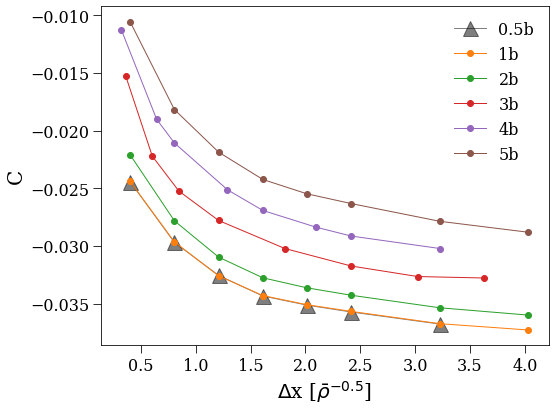

In [21]:
# set up figure size
fig, ax= plt.subplots(figsize=(8,6))

# average dislocation distance in tension created dislocation microstructure 
average_spacing=1/(2.6e16)**0.5/(0.25e-9)  

# load all data when reference voxel size is 0.5b, and plot the average 
files = glob.glob('figure-A2/refsize-*/data-ref0.5*.txt')
files.sort()

# the size of the array is based on the data structure.
# for example, for reference voxel size 0.5b, each file has the data shape [7,2] and we have 3 files
# combining all 3 files in one file would require the array size of[7,4] where the first column is the voxel size 
# and other columns correspond to fitting results in each file 
file_total = np.zeros([7,4])  

for i, f in enumerate(files):
    a = np.loadtxt(f)
    if i == 0:
        size = (f.split('refsize-')[1].split('b/data')[0])
        file_total[:,0] = a[:,0]
        file_total[:,1] = a[:,1]
    else:
        file_total[:,i+1]=a[:,1]
ax.plot(file_total[:,0]/average_spacing, np.mean(file_total[:, 1:], axis=1), '-^',\
        markersize=15, color='black',label=str(size)+'b', alpha=0.5)

    
# load all data when reference voxel size is b, and plot the average 
files = glob.glob('figure-A2/refsize-*/data-ref1*.txt')
files.sort()
file_total = np.zeros([8,4])
for i, f in enumerate(files):
    a = np.loadtxt(f)
    if i == 0:
        size = int(f.split('refsize-')[1].split('b/data')[0])
        file_total[:,0] = a[:,0]
        file_total[:,1] = a[:,1]
    else:
        file_total[:,i+1]=a[:,1]
    c = f'C{size}'
ax.plot(file_total[:,0]/average_spacing, np.mean(file_total[:,1:], axis=1), \
        '-o', color=c, label=str(size)+'b')
    

# load all data when reference voxel size is 2b, and plot the average 
files = glob.glob('figure-A2/refsize-*/data-ref2*.txt')
files.sort()
file_total = np.zeros([8,4])
for i, f in enumerate(files):
    a = np.loadtxt(f)
    if i == 0:
        size = int(f.split('refsize-')[1].split('b/data')[0])
        file_total[:,0] = a[:,0]
        file_total[:,1] = a[:,1]
    else:
        file_total[:,i+1]=a[:,1]
    c = f'C{size}'
ax.plot(file_total[:,0]/average_spacing, np.mean(file_total[:,1:], axis=1), \
        '-o', color=c, label=str(size)+'b')


# load all data when reference voxel size is 3b, and plot the average     
files = glob.glob('figure-A2/refsize-*/data-ref3*.txt')
files.sort()
file_total = np.zeros([8,4])
for i, f in enumerate(files):
    a = np.loadtxt(f)
    if i == 0:
        size = int(f.split('refsize-')[1].split('b/data')[0])
        file_total[:,0] = a[:,0]
        file_total[:,1] = a[:,1]
    else:
        file_total[:,i+1] = a[:,1]
    c = f'C{size}'
ax.plot(file_total[:,0]/average_spacing, np.mean(file_total[:,1:], axis=1), \
        '-o', color=c, label=str(size)+'b')

    
# load all data when reference voxel size is 4b, and plot the average     
files = glob.glob('figure-A2/refsize-*/data-ref4*.txt')
files.sort()
file_total = np.zeros([8,4])
for i, f in enumerate(files):
    a = np.loadtxt(f)
    if i == 0:
        size = int(f.split('refsize-')[1].split('b/data')[0])
        file_total[:,0] = a[:,0]
        file_total[:,1] = a[:,1]
    else:
        file_total[:,i+1] = a[:,1]
    c = f'C{size}'
ax.plot(file_total[:,0]/average_spacing, np.mean(file_total[:,1:], axis=1), \
        '-o', color=c, label=str(size)+'b')

    

# load all data when reference voxel size is 5b, and plot the average     
files = glob.glob('figure-A2/refsize-*/data-ref5*.txt')
files.sort()
file_total = np.zeros([8,4])
for i, f in enumerate(files):
    a = np.loadtxt(f)
    if i == 0:
        size = int(f.split('refsize-')[1].split('b/data')[0])
        file_total[:,0] = a[:,0]
        file_total[:,1] = a[:,1]
    else:
        file_total[:,i+1] = a[:,1]
    c = f'C{size}'
ax.plot(file_total[:,0]/average_spacing, np.mean(file_total[:,1:], axis=1), \
        '-o', color=c, label=str(size)+'b')

ax.legend(frameon=False, loc='upper right')
ax.set_xlabel('$\Delta$x [${\\bar{\\rho}}^{-0.5}$]')
ax.set_ylabel('C')
fig.tight_layout()